<h1>Netflix Stock Price - EDA</h1>

<h3>Import Dependencies</h3>

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import plotly

from sklearn.preprocessing import MinMaxScaler

<h3>Load Dataset</h3>

In [95]:
#load the dataset
dataset = pd.read_csv('netflix_stock_price.csv')
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

dataset.Date = pd.to_datetime(dataset['Date'])
dataset.sort_values(by=['Date'], inplace=True, ascending=True)
dataset.head(2)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000


<h3>Data Wrangling - Cleansing</h3>

In [96]:
#check the shape
print("Rows, Columns")
print(list(dataset.shape))

Rows, Columns
[4862, 7]


In [97]:
#rename the columns
dataset.rename(columns={
    'Date':'date',
    'High':'high',
    'Low':'low',
    'Open':'open',
    'Close':'close',
    'Volume':'volume',
    'Adj Close':'adj_close'
}, inplace=True)

In [98]:
#check the data type
dict(dataset.dtypes)

{'date': dtype('<M8[ns]'),
 'high': dtype('float64'),
 'low': dtype('float64'),
 'open': dtype('float64'),
 'close': dtype('float64'),
 'volume': dtype('float64'),
 'adj_close': dtype('float64')}

In [99]:
#U know what is  <M8[ns] 
#let's check does it equal to datetime64[ns] ???
print(np.dtype('datetime64[ns]') == np.dtype('<M8[ns]'))

#it's TRUE

True


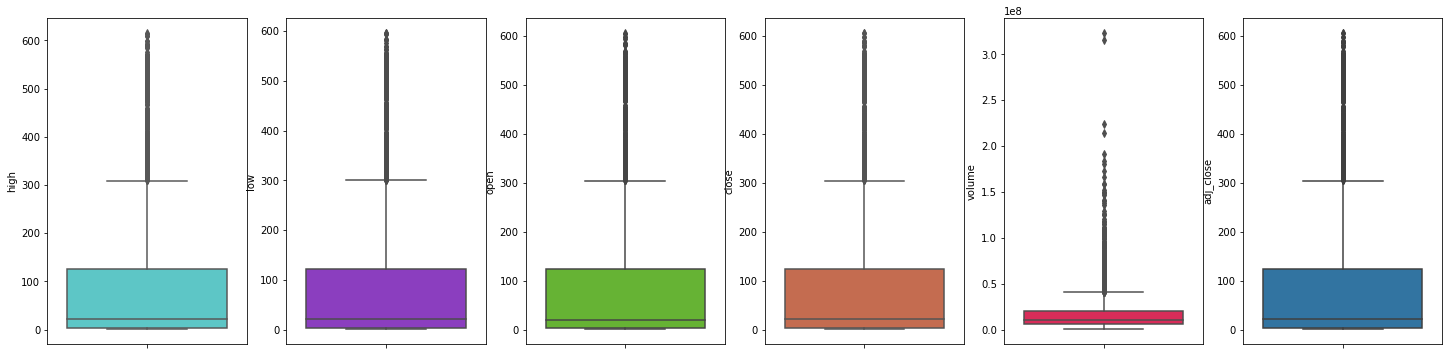

In [100]:
#check outlier
f, axes = plt.subplots(ncols=6, figsize=(25, 6))

sns.boxplot(y=dataset['high'], ax=axes[0], color='#4BD8D8')
sns.boxplot(y=dataset['low'], ax=axes[1], color='#9028D4')
sns.boxplot(y=dataset['open'], ax=axes[2], color='#62C81F')
sns.boxplot(y=dataset['close'], ax=axes[3], color='#D7623D')
sns.boxplot(y=dataset['volume'], ax=axes[4], color='#F50F4B')
sns.boxplot(y=dataset['adj_close'], ax=axes[5])
plt.show()

#if it's the outlier
#Does it really affect to our model????
#Does the outlier values correct????  

#If YESSSSSS => Dont require to clean the outliers.

In [101]:
#check null values
print(dataset.isnull().any())

#all columns are false -> Great JOB 

date         False
high         False
low          False
open         False
close        False
volume       False
adj_close    False
dtype: bool


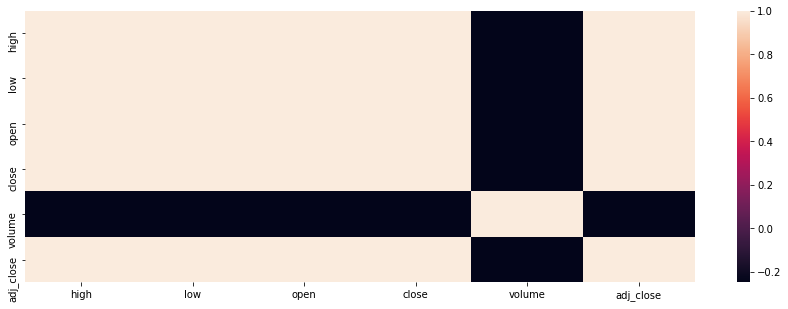

In [102]:
#let's see the correlation in each. column
plt.figure(figsize=(15,5))
correlations = dataset.corr(method='pearson')
sns.heatmap(correlations,
            xticklabels=correlations.columns.values,
           yticklabels=correlations.columns.values)
plt.show()

#if possible, allow to drop volumne. 

In [103]:
#drop the volume column from the dataset
dataset.drop('volume', axis=1, inplace=True)

<h3>Data Analysis</h3>

In [136]:
# Make A Plot Function
def draw_plot_timeseries(tdf, label1, label2, col, title, c1, c2):
    # Figuring the size
    plt.figure(figsize=(20,5))
    # Create a lineplot for data 1
    sns.lineplot(data=tdf,
                 label=label1,
                 legend=False, color=c1)
    # Create a lineplot for data 2
    sns.lineplot(data=dataset[col],
                 label=label2,
                 legend=False, color=c2)
    # Create a title
    plt.title(title, fontweight='bold')
    # Show the legend
    plt.legend()    
    # Show the plot
    plt.show()
def draw_line_plot(col1, col2, title, label1, label2, co1, co2):
    
    fig, ax = plt.subplots(figsize=(20,5))
    sns.lineplot(data=col1, label=label1, legend=False, color=co1)
    sns.lineplot(data=col2, label=label2, legend=False, color=co2)
    
    plt.legend()
    plt.title(title, fontweight='bold')
    plt.show()

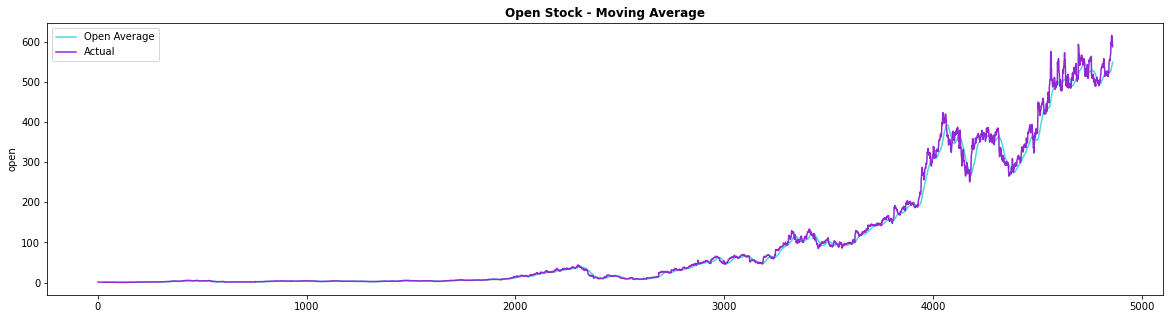

In [146]:
# Prepare Data
open_stock = dataset['open']
average_open_stock = open_stock.rolling(window=30).mean()

# Plotting Data
draw_plot_timeseries(average_open_stock, # Data
                'Open Average', # Label 1
                'Actual', # Label 2
                'high', # Column of the 
                'Open Stock - Moving Average', '#4BD8D8', '#9028D4') # Title

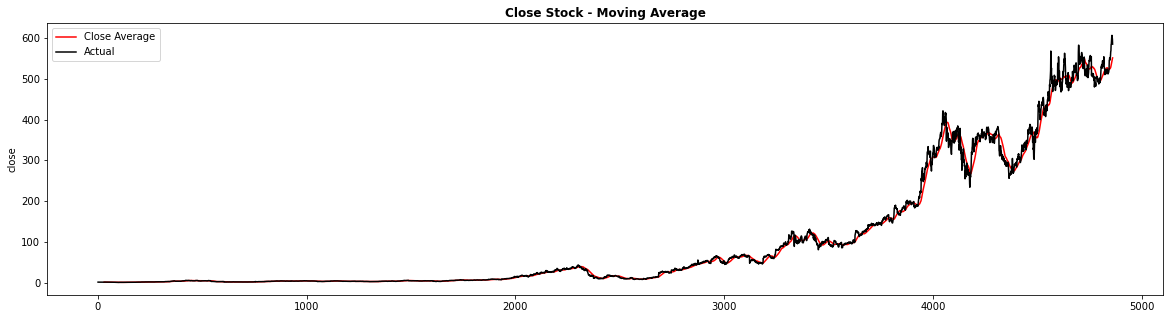

In [138]:
#plot the date and open
#fig, ax = plt.subplots(figsize=(20,5))
#plt.plot(dataset["date"], dataset["open"], color='#4BD8D8')
#ax.set_xlabel('date', fontsize='11')
#ax.set_ylabel('price - dollars', fontsize='11')
#plt.title('Netflix Stock Prices - Open ', fontweight='bold')
#plt.show()
#plt.grid()
# Prepare Data
close_stock = dataset['close']
average_close_stock = close_stock.rolling(window=30).mean()

# Plotting Data
draw_plot_timeseries(average_close_stock, # Data
                'Close Average', # Label 1
                'Actual', # Label 2
                'open', # Column of the Data
                'Close Stock - Moving Average', 'red', 'black') # Title

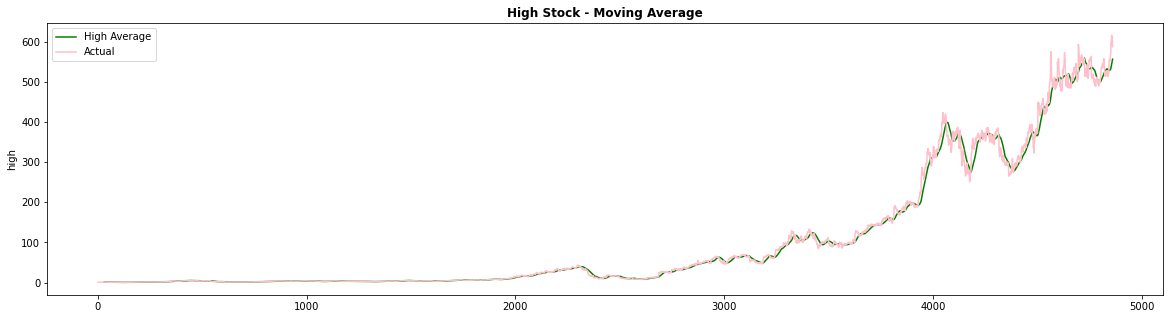

In [139]:
#plot the date and open
#fig, ax = plt.subplots(figsize=(20,5))
#plt.plot(dataset["date"], dataset["close"], color='#9028D4')
#ax.set_xlabel('date', fontsize='11')
#ax.set_ylabel('price - dollars', fontsize='11')
#plt.title('Netflix Stock Prices - Close ', fontweight='bold')
#plt.show()
#plt.grid()

high_stock = dataset['high']
average_high_stock = high_stock.rolling(window=30).mean()

# Plotting Data
draw_plot_timeseries(average_high_stock, # Data
                'High Average', # Label 1
                'Actual', # Label 2
                'high', # Column of the Data
                'High Stock - Moving Average', 'green', 'pink') # Title

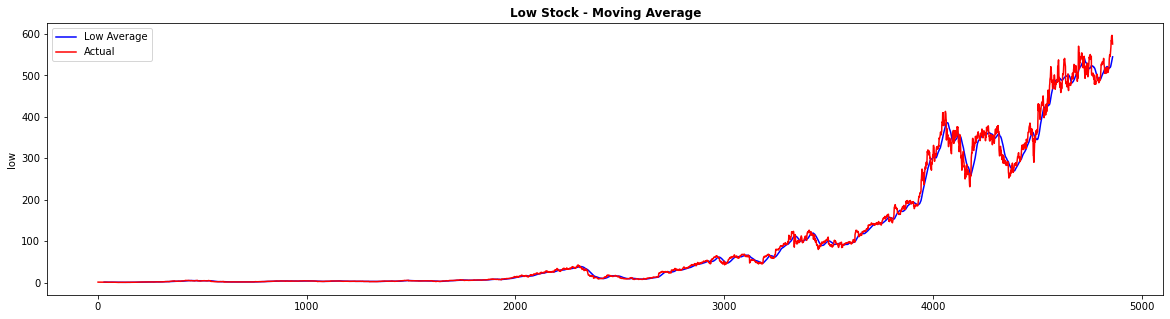

In [140]:
#plot the date and open
#fig, ax = plt.subplots(figsize=(20,5))
#plt.plot(dataset["date"], dataset["high"], color='red')
#plt.plot(dataset["date"], dataset["low"], color='blue')
#ax.set_xlabel('date', fontsize='11')
#ax.set_ylabel('price - dollars', fontsize='11')
#plt.title('Netflix Stock Prices - High & Low ', fontweight='bold')
#plt.show()
#plt.grid()

low_stock = dataset['low']
average_low_stock = low_stock.rolling(window=30).mean()

# Plotting Data
draw_plot_timeseries(average_low_stock, # Data
                'Low Average', # Label 1
                'Actual', # Label 2
                'low', # Column of the Data
                'Low Stock - Moving Average', 'blue', 'red') # Title

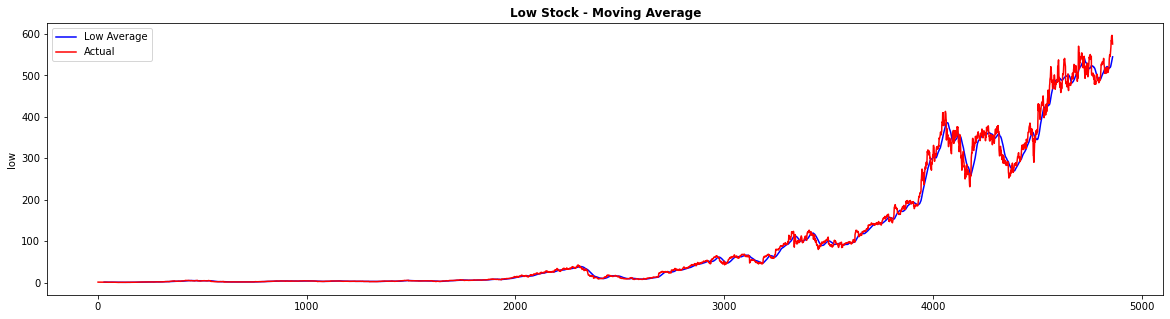

In [141]:
low_stock = dataset['low']
average_low_stock = low_stock.rolling(window=30).mean()

# Plotting Data
draw_plot_timeseries(average_low_stock, # Data
                'Low Average', # Label 1
                'Actual', # Label 2
                'low', # Column of the Data
                'Low Stock - Moving Average', 'blue', 'red') # Title

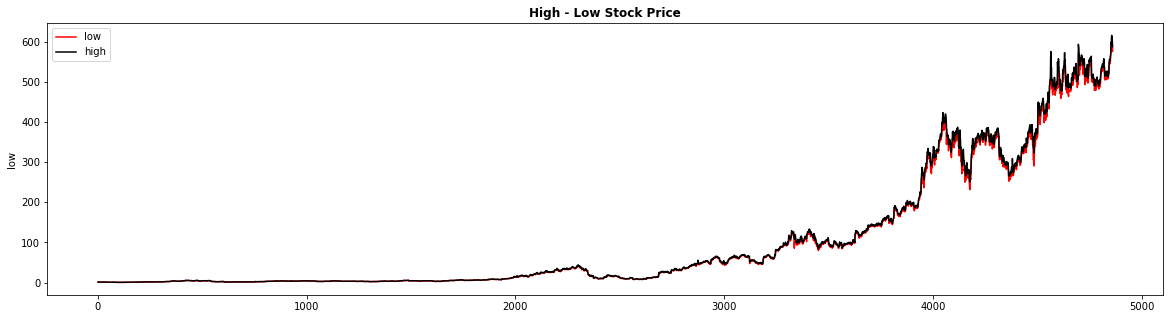

In [151]:
#High and Close stock price
draw_line_plot(dataset.low, dataset.high, 'High - Low Stock Price', 'low','high', 'red','black')

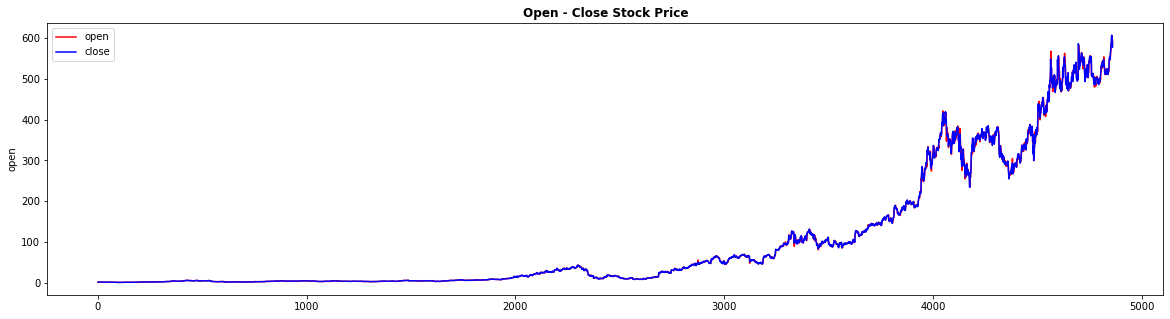

In [155]:
#High and Close stock price
draw_line_plot(dataset.open, dataset.close, 'Open - Close Stock Price', 'open','close', 'red','blue')

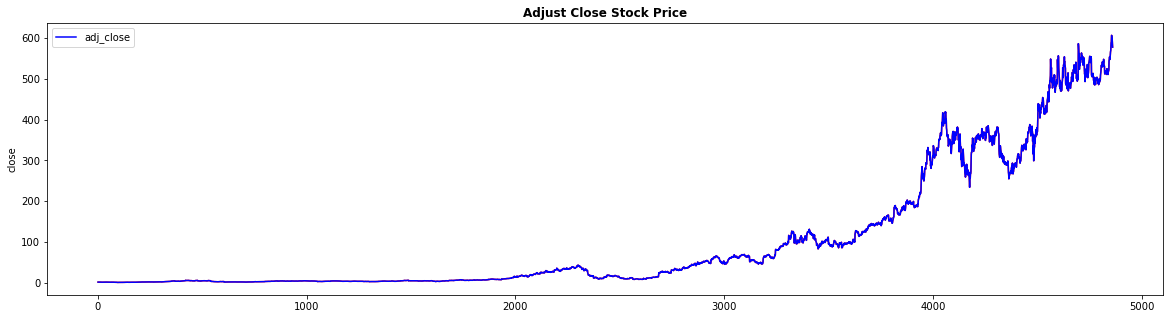

In [157]:
#High and Close stock price
draw_line_plot(dataset.close, dataset.adj_close, 'Adjust Close Stock Price', '','adj_close', 'red','blue')

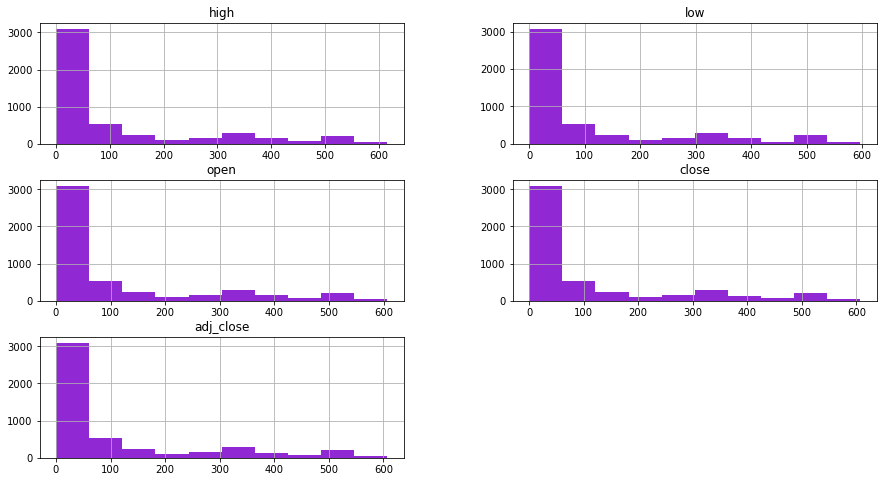

In [165]:
dataset.hist(figsize=(15, 8), color='#9028D4')
#dataset['close'].hist(figsize=(8, 5), color='#9028D4')
plt.show()

<h3>Data Preprocessing</h3>

In [167]:
#drop the adj_close
del dataset['adj_close']

In [169]:
#check date data type
type(dataset.date)

pandas.core.series.Series

In [171]:
# Let's set the Date column to index
dataset.set_index('date', inplace=True)

In [184]:
#scale the dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(dataset)
#scaled_dataset.shape
data_scale = pd.DataFrame(scaled_dataset)
data_scale.rename(columns={
    '0':'high',
    '1':'low',
    '2':'open',
    '3':'close'
}, inplace=True)

In [185]:
#copy the dataset
data = dataset.copy()
#save cleaned and processed dataset
data.to_csv('netflix_clean_stock_price_dataset.csv')
data

,high,low,open,close
date,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429
2002-05-24,1.225000,1.197143,1.214286,1.210000
2002-05-28,1.232143,1.157143,1.213571,1.157143
2002-05-29,1.164286,1.085714,1.164286,1.103571
2002-05-30,1.107857,1.071429,1.107857,1.071429
...,...,...,...,...
2021-09-08,615.599976,595.710022,603.840027,606.049988
2021-09-09,609.440002,596.549988,606.469971,597.539978
2021-09-10,609.450012,593.669983,598.159973,598.719971


In [186]:
data_scale

,0,1,2,3
0,0.001353,0.001341,0.001285,0.001358
1,0.001324,0.001427,0.001380,0.001381
2,0.001335,0.001360,0.001379,0.001293
3,0.001225,0.001240,0.001298,0.001205
4,0.001133,0.001216,0.001204,0.001152
...,...,...,...,...
4857,1.000000,0.998591,0.995661,0.998911
4858,0.989987,1.000000,1.000000,0.984876
4859,0.990003,0.995169,0.986289,0.986822
4860,0.972318,0.976904,0.986966,0.971270
